# Question 2 (a-e)

100%|██████████| 100/100 [00:00<00:00, 127.89it/s]


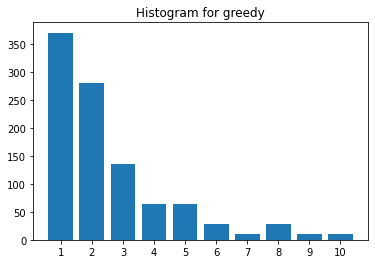

100%|██████████| 100/100 [00:01<00:00, 94.85it/s]


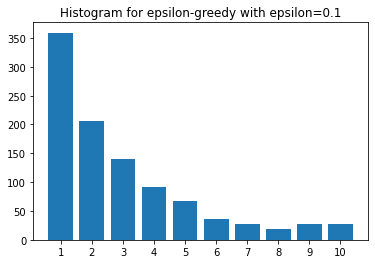

100%|██████████| 100/100 [00:01<00:00, 96.92it/s]


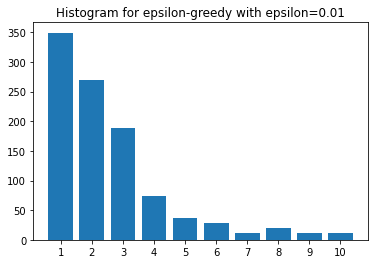

100%|██████████| 100/100 [00:01<00:00, 98.09it/s]


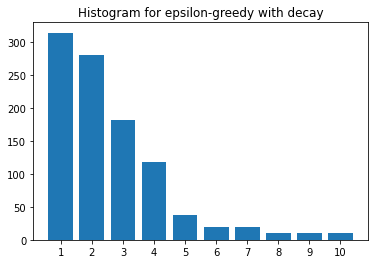

100%|██████████| 100/100 [00:01<00:00, 88.32it/s]


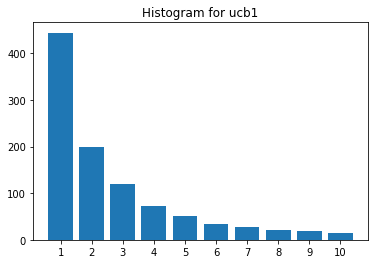

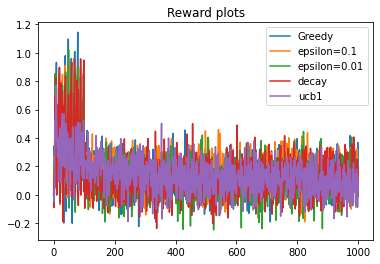

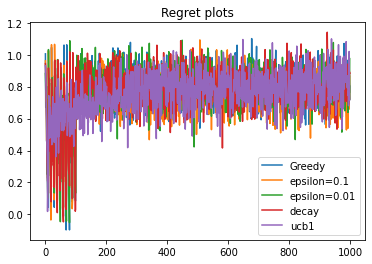

In [1]:
import numpy as np
import random
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

random.seed(422)
np.random.seed(422)


def bandit(arm):
    k=10
    means = [1 - (i + 1) / (k + 1) for i in range(k)]
    return np.random.normal(means[arm], 1, 1)[0]


def greedy():
    k = 10
    T = 1000
    regrets = [0 for _ in range(T)]
    tot_rewards = [0 for _ in range(T)]
    arm_count = [0 for _ in range(k)]
    num_runs = 100
    epsilon = T**(-1/3)
    for _ in tqdm(range(num_runs)):
        rewards = [0 for _ in range(k)]
        for n in range(int(epsilon*T/k)*k):
            chosen_expert = n % k
            arm_count[chosen_expert] += 1
            if chosen_expert == 0:
                reward = bandit(0)
                rewards[0] += reward
                tot_rewards[n] += reward
                continue
            reward = bandit(chosen_expert)
            tot_rewards[n] += reward
            best_reward = bandit(0)
            regret = best_reward - reward
            rewards[chosen_expert] += reward
            regrets[n] += regret
        for t in range(int(epsilon*T/k)*k, T):
            chosen_expert = k-1-np.argmax(rewards[::-1])
            reward = bandit(chosen_expert)
            arm_count[chosen_expert] += 1
            if chosen_expert != 0:
                best_reward = bandit(0)
                regret = best_reward - reward
                regrets[t] += regret
            tot_rewards[t] += reward
            rewards[chosen_expert] += reward
    tot_rewards = [i/num_runs for i in tot_rewards]
    regrets = [i/num_runs for i in regrets]
    arm_count = [i/num_runs for i in arm_count]
    return regrets, tot_rewards, arm_count


def epsilon_greedy(eps):
    k = 10
    T = 1000
    regrets = [0 for _ in range(T)]
    tot_rewards = [0 for _ in range(T)]
    arm_count = [0 for _ in range(k)]
    num_runs = 100
    epsilon = T**(-1/3)
    for _ in tqdm(range(num_runs)):
        rewards = [0 for _ in range(k)]
        for n in range(int(epsilon*T/k)*k):
            chosen_expert = n % k
            arm_count[chosen_expert] += 1
            if chosen_expert == 0:
                reward = bandit(0)
                rewards[0] += reward
                tot_rewards[n] += reward
                continue
            reward = bandit(chosen_expert)
            tot_rewards[n] += reward
            best_reward = bandit(0)
            regret = best_reward - reward
            rewards[chosen_expert] += reward
            regrets[n] += regret
        for t in range(int(epsilon*T/k)*k, T):
            chosen_expert = k-1-np.argmax(rewards[::-1])
            wts = [eps/k for _ in range(k)]
            wts[chosen_expert] += 1-eps
            chosen_expert = random.choices(list(range(k)), wts, k=1)[0]
            reward = bandit(chosen_expert)
            arm_count[chosen_expert] += 1
            if chosen_expert != 0:
                best_reward = bandit(0)
                regret = best_reward - reward
                regrets[t] += regret
            tot_rewards[t] += reward
            rewards[chosen_expert] += reward
    tot_rewards = [i/num_runs for i in tot_rewards]
    regrets = [i/num_runs for i in regrets]
    arm_count = [i/num_runs for i in arm_count]
    return regrets, tot_rewards, arm_count


def epsilon_greedy_decay():
    eps = 1
    k = 10
    T = 1000
    regrets = [0 for _ in range(T)]
    tot_rewards = [0 for _ in range(T)]
    arm_count = [0 for _ in range(k)]
    num_runs = 100
    epsilon = T**(-1/3)
    for _ in tqdm(range(num_runs)):
        rewards = [0 for _ in range(k)]
        for n in range(int(epsilon*T/k)*k):
            chosen_expert = n % k
            arm_count[chosen_expert] += 1
            if chosen_expert == 0:
                reward = bandit(0)
                rewards[0] += reward
                tot_rewards[n] += reward
                continue
            reward = bandit(chosen_expert)
            tot_rewards[n] += reward
            best_reward = bandit(0)
            regret = best_reward - reward
            rewards[chosen_expert] += reward
            regrets[n] += regret
        for t in range(int(epsilon*T/k)*k, T):
            eps *= (t-1)/t
            chosen_expert = k-1-np.argmax(rewards[::-1])
            wts = [eps/k for _ in range(k)]
            wts[chosen_expert] += 1-eps
            chosen_expert = random.choices(list(range(k)), wts, k=1)[0]
            reward = bandit(chosen_expert)
            arm_count[chosen_expert] += 1
            if chosen_expert != 0:
                best_reward = bandit(0)
                regret = best_reward - reward
                regrets[t] += regret
            tot_rewards[t] += reward
            rewards[chosen_expert] += reward
    tot_rewards = [i/num_runs for i in tot_rewards]
    regrets = [i/num_runs for i in regrets]
    arm_count = [i/num_runs for i in arm_count]
    return regrets, tot_rewards, arm_count


def ucb1():
    k = 10
    T = 1000
    regrets = [0 for _ in range(T)]
    rewards = [0 for _ in range(T)]
    num_runs = 100
    arm_count = [0 for _ in range(k)]
    for _ in tqdm(range(num_runs)):
        estimated_means = [0 for _ in range(k)]
        num_seen = [0 for _ in range(k)]
        for i in range(k):
            reward = bandit(i)
            rewards[i] += reward
            if i != 0:
                best_reward = bandit(0)
                regret = best_reward - reward
                regrets[i] += regret
            estimated_means[i] = estimated_means[i] * num_seen[i] + reward
            num_seen[i] += 1
            estimated_means[i] /= num_seen[i]
        for h in range(k, T):
            ucb = [estimated_means[i]+(2*math.log(h)/num_seen[i])**0.5 for i in range(k)]
            chosen_expert = k-1-np.argmax(ucb[::-1])
            reward = bandit(chosen_expert)
            rewards[h] += reward
            if chosen_expert != 0:
                best_reward = bandit(0)
                regret = best_reward - reward
                regrets[h] += regret
            estimated_means[chosen_expert] = estimated_means[chosen_expert] * num_seen[chosen_expert] + reward
            num_seen[chosen_expert] += 1
            estimated_means[chosen_expert] /= num_seen[chosen_expert]
        for i in range(k):
            arm_count[i] += num_seen[i]
    rewards = [i/num_runs for i in rewards]
    regrets = [i/num_runs for i in regrets]
    arm_count = [i/num_runs for i in arm_count]
    return regrets, rewards, arm_count


reward_greedy, regret_greedy, arm_count_greedy = greedy()
plt.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], arm_count_greedy)
plt.title("Histogram for greedy")
plt.show()

reward_eps_greedy_0_1, regret_eps_greedy_0_1, arm_count_eps_greedy_0_1 = epsilon_greedy(0.1)
plt.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], arm_count_eps_greedy_0_1)
plt.title("Histogram for epsilon-greedy with epsilon=0.1")
plt.show()

reward_eps_greedy_00_1, regret_eps_greedy_00_1, arm_count_eps_greedy_00_1 = epsilon_greedy(0.01)
plt.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], arm_count_eps_greedy_00_1)
plt.title("Histogram for epsilon-greedy with epsilon=0.01")
plt.show()

reward_eps_greedy_decay, regret_eps_greedy_decay, arm_count_eps_greedy_decay = epsilon_greedy_decay()
plt.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], arm_count_eps_greedy_decay)
plt.title("Histogram for epsilon-greedy with decay")
plt.show()

reward_ucb, regret_ucb, arm_count_ucb = ucb1()
plt.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], arm_count_ucb)
plt.title("Histogram for ucb1")
plt.show()

plt.plot(reward_greedy, label="Greedy")
plt.plot(reward_eps_greedy_0_1, label="epsilon=0.1")
plt.plot(reward_eps_greedy_00_1, label="epsilon=0.01")
plt.plot(reward_eps_greedy_decay, label="decay")
plt.plot(reward_ucb, label="ucb1")
plt.legend()
plt.title("Reward plots")
plt.show()

plt.plot(regret_greedy, label="Greedy")
plt.plot(regret_eps_greedy_0_1, label="epsilon=0.1")
plt.plot(regret_eps_greedy_00_1, label="epsilon=0.01")
plt.plot(regret_eps_greedy_decay, label="decay")
plt.plot(regret_ucb, label="ucb1")
plt.legend()
plt.title("Regret plots")
plt.show()

# Question 2 f
Certainly, UCB1 algorithm is much better than other algorithms because it is choosing the best arm (arm 1) the most number of times.
# Question 2 g

100%|██████████| 100/100 [00:00<00:00, 128.74it/s]


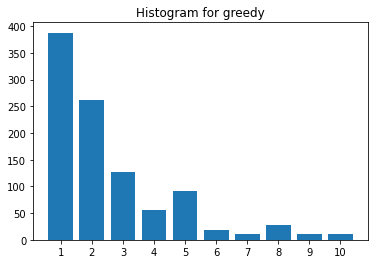

100%|██████████| 100/100 [00:01<00:00, 97.35it/s]


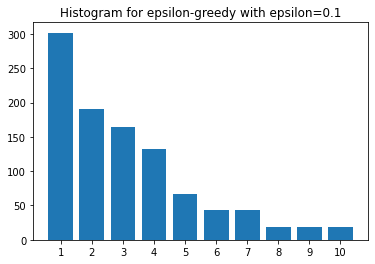

100%|██████████| 100/100 [00:01<00:00, 97.96it/s]


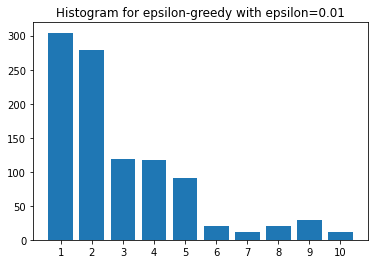

100%|██████████| 100/100 [00:01<00:00, 98.51it/s]


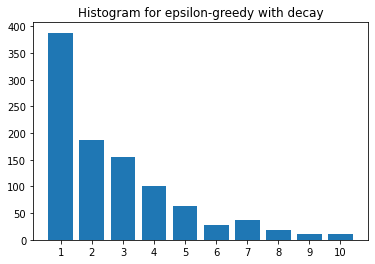

100%|██████████| 100/100 [00:01<00:00, 83.95it/s]


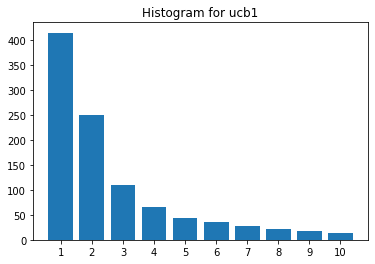

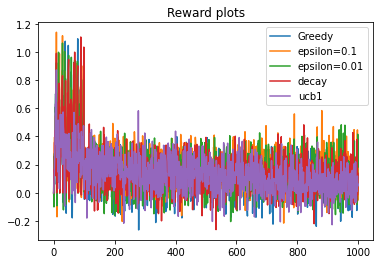

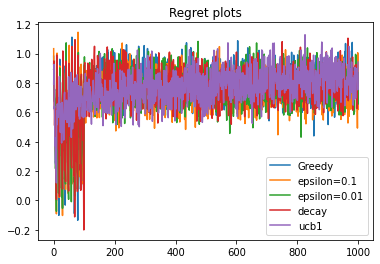

In [2]:
import numpy as np
import random
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

random.seed(422)
np.random.seed(422)


def bandit(arm):
    k=10
    means = [1 - (i + 1) / (k + 1) for i in range(k)]
    means[1] = means[0]-0.05
    return np.random.normal(means[arm], 1, 1)[0]


def greedy():
    k = 10
    T = 1000
    regrets = [0 for _ in range(T)]
    tot_rewards = [0 for _ in range(T)]
    arm_count = [0 for _ in range(k)]
    num_runs = 100
    epsilon = T**(-1/3)
    for _ in tqdm(range(num_runs)):
        rewards = [0 for _ in range(k)]
        for n in range(int(epsilon*T/k)*k):
            chosen_expert = n % k
            arm_count[chosen_expert] += 1
            if chosen_expert == 0:
                reward = bandit(0)
                rewards[0] += reward
                tot_rewards[n] += reward
                continue
            reward = bandit(chosen_expert)
            tot_rewards[n] += reward
            best_reward = bandit(0)
            regret = best_reward - reward
            rewards[chosen_expert] += reward
            regrets[n] += regret
        for t in range(int(epsilon*T/k)*k, T):
            chosen_expert = k-1-np.argmax(rewards[::-1])
            reward = bandit(chosen_expert)
            arm_count[chosen_expert] += 1
            if chosen_expert != 0:
                best_reward = bandit(0)
                regret = best_reward - reward
                regrets[t] += regret
            tot_rewards[t] += reward
            rewards[chosen_expert] += reward
    tot_rewards = [i/num_runs for i in tot_rewards]
    regrets = [i/num_runs for i in regrets]
    arm_count = [i/num_runs for i in arm_count]
    return regrets, tot_rewards, arm_count


def epsilon_greedy(eps):
    k = 10
    T = 1000
    regrets = [0 for _ in range(T)]
    tot_rewards = [0 for _ in range(T)]
    arm_count = [0 for _ in range(k)]
    num_runs = 100
    epsilon = T**(-1/3)
    for _ in tqdm(range(num_runs)):
        rewards = [0 for _ in range(k)]
        for n in range(int(epsilon*T/k)*k):
            chosen_expert = n % k
            arm_count[chosen_expert] += 1
            if chosen_expert == 0:
                reward = bandit(0)
                rewards[0] += reward
                tot_rewards[n] += reward
                continue
            reward = bandit(chosen_expert)
            tot_rewards[n] += reward
            best_reward = bandit(0)
            regret = best_reward - reward
            rewards[chosen_expert] += reward
            regrets[n] += regret
        for t in range(int(epsilon*T/k)*k, T):
            chosen_expert = k-1-np.argmax(rewards[::-1])
            wts = [eps/k for _ in range(k)]
            wts[chosen_expert] += 1-eps
            chosen_expert = random.choices(list(range(k)), wts, k=1)[0]
            reward = bandit(chosen_expert)
            arm_count[chosen_expert] += 1
            if chosen_expert != 0:
                best_reward = bandit(0)
                regret = best_reward - reward
                regrets[t] += regret
            tot_rewards[t] += reward
            rewards[chosen_expert] += reward
    tot_rewards = [i/num_runs for i in tot_rewards]
    regrets = [i/num_runs for i in regrets]
    arm_count = [i/num_runs for i in arm_count]
    return regrets, tot_rewards, arm_count


def epsilon_greedy_decay():
    eps = 1
    k = 10
    T = 1000
    regrets = [0 for _ in range(T)]
    tot_rewards = [0 for _ in range(T)]
    arm_count = [0 for _ in range(k)]
    num_runs = 100
    epsilon = T**(-1/3)
    for _ in tqdm(range(num_runs)):
        rewards = [0 for _ in range(k)]
        for n in range(int(epsilon*T/k)*k):
            chosen_expert = n % k
            arm_count[chosen_expert] += 1
            if chosen_expert == 0:
                reward = bandit(0)
                rewards[0] += reward
                tot_rewards[n] += reward
                continue
            reward = bandit(chosen_expert)
            tot_rewards[n] += reward
            best_reward = bandit(0)
            regret = best_reward - reward
            rewards[chosen_expert] += reward
            regrets[n] += regret
        for t in range(int(epsilon*T/k)*k, T):
            eps *= (t-1)/t
            chosen_expert = k-1-np.argmax(rewards[::-1])
            wts = [eps/k for _ in range(k)]
            wts[chosen_expert] += 1-eps
            chosen_expert = random.choices(list(range(k)), wts, k=1)[0]
            reward = bandit(chosen_expert)
            arm_count[chosen_expert] += 1
            if chosen_expert != 0:
                best_reward = bandit(0)
                regret = best_reward - reward
                regrets[t] += regret
            tot_rewards[t] += reward
            rewards[chosen_expert] += reward
    tot_rewards = [i/num_runs for i in tot_rewards]
    regrets = [i/num_runs for i in regrets]
    arm_count = [i/num_runs for i in arm_count]
    return regrets, tot_rewards, arm_count


def ucb1():
    k = 10
    T = 1000
    regrets = [0 for _ in range(T)]
    rewards = [0 for _ in range(T)]
    num_runs = 100
    arm_count = [0 for _ in range(k)]
    for _ in tqdm(range(num_runs)):
        estimated_means = [0 for _ in range(k)]
        num_seen = [0 for _ in range(k)]
        for i in range(k):
            reward = bandit(i)
            rewards[i] += reward
            if i != 0:
                best_reward = bandit(0)
                regret = best_reward - reward
                regrets[i] += regret
            estimated_means[i] = estimated_means[i] * num_seen[i] + reward
            num_seen[i] += 1
            estimated_means[i] /= num_seen[i]
        for h in range(k, T):
            ucb = [estimated_means[i]+(2*math.log(h)/num_seen[i])**0.5 for i in range(k)]
            chosen_expert = k-1-np.argmax(ucb[::-1])
            reward = bandit(chosen_expert)
            rewards[h] += reward
            if chosen_expert != 0:
                best_reward = bandit(0)
                regret = best_reward - reward
                regrets[h] += regret
            estimated_means[chosen_expert] = estimated_means[chosen_expert] * num_seen[chosen_expert] + reward
            num_seen[chosen_expert] += 1
            estimated_means[chosen_expert] /= num_seen[chosen_expert]
        for i in range(k):
            arm_count[i] += num_seen[i]
    rewards = [i/num_runs for i in rewards]
    regrets = [i/num_runs for i in regrets]
    arm_count = [i/num_runs for i in arm_count]
    return regrets, rewards, arm_count


reward_greedy, regret_greedy, arm_count_greedy = greedy()
plt.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], arm_count_greedy)
plt.title("Histogram for greedy")
plt.show()

reward_eps_greedy_0_1, regret_eps_greedy_0_1, arm_count_eps_greedy_0_1 = epsilon_greedy(0.1)
plt.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], arm_count_eps_greedy_0_1)
plt.title("Histogram for epsilon-greedy with epsilon=0.1")
plt.show()

reward_eps_greedy_00_1, regret_eps_greedy_00_1, arm_count_eps_greedy_00_1 = epsilon_greedy(0.01)
plt.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], arm_count_eps_greedy_00_1)
plt.title("Histogram for epsilon-greedy with epsilon=0.01")
plt.show()

reward_eps_greedy_decay, regret_eps_greedy_decay, arm_count_eps_greedy_decay = epsilon_greedy_decay()
plt.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], arm_count_eps_greedy_decay)
plt.title("Histogram for epsilon-greedy with decay")
plt.show()

reward_ucb, regret_ucb, arm_count_ucb = ucb1()
plt.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], arm_count_ucb)
plt.title("Histogram for ucb1")
plt.show()

plt.plot(reward_greedy, label="Greedy")
plt.plot(reward_eps_greedy_0_1, label="epsilon=0.1")
plt.plot(reward_eps_greedy_00_1, label="epsilon=0.01")
plt.plot(reward_eps_greedy_decay, label="decay")
plt.plot(reward_ucb, label="ucb1")
plt.legend()
plt.title("Reward plots")
plt.show()

plt.plot(regret_greedy, label="Greedy")
plt.plot(regret_eps_greedy_0_1, label="epsilon=0.1")
plt.plot(regret_eps_greedy_00_1, label="epsilon=0.01")
plt.plot(regret_eps_greedy_decay, label="decay")
plt.plot(regret_ucb, label="ucb1")
plt.legend()
plt.title("Regret plots")
plt.show()

Here, $\epsilon$-greedy with epsilon=0.01 seems to be performing as good as UCB1 considering both arms 1 and 2 to be optimal choices. However, UCB1 is still better choice because it is choosing arm 1 more number of times which is slightly better than arm 2.

# Question 3
### Part A

In [3]:
import numpy as np

"""Tic-Tac-Toe environment with both safe and random opponent"""
import random
random.seed(422)
np.random.seed(422)

class TicTacToe:
    def __init__(self, opponent):
        self.board = [[None, None, None], [None, None, None], [None, None, None]]
        starter = random.randint(0, 1)
        self.opponent = self.random_opponent if opponent == "random" else self.safe_opponent
        if starter == 0:
            self.opponent()

    def act(self, position):
        assert self.board[position[0]][position[1]] is None, "Invalid move"
        self.board[position[0]][position[1]] = "X"
        lis = [set(self.board[0]), set(self.board[1]), set(self.board[2]), set([self.board[i][i] for i in range(3)]), set([self.board[i][2-i] for i in range(3)])]
        lis.extend([{x, y, z} for x, y, z in zip(*self.board)])
        if {"X"} in lis:
            return 1
        self.opponent()
        lis = [set(self.board[0]), set(self.board[1]), set(self.board[2]), set([self.board[i][i] for i in range(3)]), set([self.board[i][2-i] for i in range(3)])]
        lis.extend([{x, y, z} for x, y, z in zip(*self.board)])
        if {"O"} in lis:
            return -1
        return 0

    def print_board(self):
        print(self.board)

    def pseudo_act_opponent(self, position):
        board = deepcopy(self.board)
        board[position[0]][position[1]] = "O"
        lis = [set(board[0]), set(board[1]), set(board[2]), set([board[i][i] for i in range(3)]), set([board[i][2-i] for i in range(3)])]
        lis.extend([{x, y, z} for x, y, z in zip(*board)])
        if {"O"} in lis:
            return 1
        return 0

    def pseudo_act_agent(self, position):
        board = deepcopy(self.board)
        board[position[0]][position[1]] = "X"
        lis = [set(board[0]), set(board[1]), set(board[2]), set([board[i][i] for i in range(3)]), set([board[i][2-i] for i in range(3)])]
        lis.extend([{x, y, z} for x, y, z in zip(*board)])
        if {"X"} in lis:
            return 1
        return 0

    def random_opponent(self):
        moves = [[i//3, i%3] for i in range(9) if self.board[i//3][i%3] is None]
        if len(moves) > 0:
            move = random.randint(0, len(moves)-1)
            move = moves[move]
            self.board[move[0]][move[1]] = "O"

    def safe_opponent(self):
        moves = [[i//3, i%3] for i in range(9) if self.board[i//3][i%3] is None]
        for i in moves:
            if self.pseudo_act_opponent(i):
                self.board[i[0]][i[1]] = "O"
                return
        for i in moves:
            if self.pseudo_act_agent(i):
                self.board[i[0]][i[1]] = "O"
                return
        if len(moves) > 0:
            move = random.randint(0, len(moves)-1)
            move = moves[move]
            self.board[move[0]][move[1]] = "O"


In [4]:
from copy import deepcopy
import math
from tqdm import tqdm

class Agent:
    def __init__(self):
        self.tree = None
        self.tree2 = None
        self.game = None
        self.sim = None
        self.path = None
        self.path2 = None
        self.result = None

    def mcts(self, node, sim):
        self.tree = {tuple(tuple(i) for i in node):{}}
        self.tree2 = {}
        for p in range(2*sim):
            self.game = deepcopy(node)
            self.sim = p
            self.path = []
            self.path2 = []
            reward, player = self.traverse()
            moves = [(i//3, i%3) for i in range(9) if self.game[i//3][i%3] is None]
            if reward == 0 and len(moves) != 0:
                reward = self.rollout(player)
            self.backpropogate(reward)
        tmp = tuple(tuple(i) for i in node)
        next_move = None
        max_val = -10000000
        for move in self.tree[tmp]:
            l, d, w, n = self.tree[tmp][move]
            val = (w-l)/(l+d+w)
            if val >= max_val:
                next_move = move
                max_val = val
        return next_move


    def selection(self, player):
        tree = self.tree if player == 0 else self.tree2
        tree2 = self.tree if player != 0 else self.tree2
        path = self.path if player == 0 else self.path2
        moves = [(i//3, i%3) for i in range(9) if self.game[i//3][i%3] is None]
        ucbs = []
        tmp = tuple(tuple(i) for i in self.game)
        for move in moves:
            l, d, w, n = tree[tmp][move]
            val = (w-l)/(l+d+w)
            c = 5
            ucb = val + c * (math.log(self.sim)/n)**0.5
            ucbs.append(ucb)
        max_val = max(ucbs)
        best_moves = []
        for index, ucb in enumerate(ucbs):
            if ucb == max_val:
                best_moves.append(moves[index])
        next_move = best_moves[random.randint(0, len(best_moves)-1)]
        path.append([tmp, next_move])
        reward = 0
        if player == 0:
            self.game[next_move[0]][next_move[1]] = "X"
            lis = [set(self.game[0]), set(self.game[1]), set(self.game[2]), set([self.game[i][i] for i in range(3)]), set([self.game[i][2-i] for i in range(3)])]
            lis.extend([{x, y, z} for x, y, z in zip(*self.game)])
            if {"X"} in lis:
                reward = 1
        else:
            self.game[next_move[0]][next_move[1]] = "O"
            lis = [set(self.game[0]), set(self.game[1]), set(self.game[2]), set([self.game[i][i] for i in range(3)]), set([self.game[i][2-i] for i in range(3)])]
            lis.extend([{x, y, z} for x, y, z in zip(*self.game)])
            if {"O"} in lis:
                reward = -1
        tmp = tuple(tuple(i) for i in self.game)
        if tmp not in tree2:
            tree2[tmp] = {}
        return reward

    def traverse(self):
        while 1:
            if self.check_expanded(0):
                reward = self.selection(0)
                moves = [(i//3, i%3) for i in range(9) if self.game[i//3][i%3] is None]
                if reward != 0 or len(moves) == 0:
                    return reward, 1
            else:
                player_for_exploration = 0
                break
            if self.check_expanded(1):
                reward = self.selection(1)
                moves = [(i//3, i%3) for i in range(9) if self.game[i//3][i%3] is None]
                if reward != 0 or len(moves) == 0:
                    return reward, 0
            else:
                player_for_exploration = 1
                break
        return self.random_unexpanded_child(player_for_exploration), 1-player_for_exploration

    def random_unexpanded_child(self, player):
        tree = self.tree if player == 0 else self.tree2
        tree2 = self.tree if player != 0 else self.tree2
        moves = [(i//3, i%3) for i in range(9) if self.game[i//3][i%3] is None]
        unexplored_moves = []
        tmp = tuple(tuple(i) for i in self.game)
        for move in moves:
            if move not in tree[tmp]:
                unexplored_moves.append(move)
        moves = unexplored_moves
        move = random.randint(0, len(moves)-1)
        move = moves[move]
        path = self.path if player == 0 else self.path2
        path.append([tmp, move])
        tree[tmp][move] = [0, 0, 0, 0]
        reward = 0
        if player == 0:
            self.game[move[0]][move[1]] = "X"
            lis = [set(self.game[0]), set(self.game[1]), set(self.game[2]), set([self.game[i][i] for i in range(3)]), set([self.game[i][2-i] for i in range(3)])]
            lis.extend([{x, y, z} for x, y, z in zip(*self.game)])
            if {"X"} in lis:
                reward = 1
        else:
            self.game[move[0]][move[1]] = "O"
            lis = [set(self.game[0]), set(self.game[1]), set(self.game[2]), set([self.game[i][i] for i in range(3)]), set([self.game[i][2-i] for i in range(3)])]
            lis.extend([{x, y, z} for x, y, z in zip(*self.game)])
            if {"O"} in lis:
                reward = -1
        tmp = tuple(tuple(i) for i in self.game)
        if tmp not in tree2:
            tree2[tmp] = {}
        return reward

    def check_expanded(self, player):
        moves = [(i//3, i%3) for i in range(9) if self.game[i//3][i%3] is None]
        tree = self.tree if player == 0 else self.tree2
        tmp = tuple(tuple(i) for i in self.game)
        for move in moves:
            if move not in tree[tmp]:
                return 0
        return 1

    def rollout(self, player):
        while 1:
            if player == 0:
                moves = [[i//3, i%3] for i in range(9) if self.game[i//3][i%3] is None]
                move = moves[random.randint(0, len(moves)-1)]
                self.game[move[0]][move[1]] = "X"
                lis = [set(self.game[0]), set(self.game[1]), set(self.game[2]), set([self.game[i][i] for i in range(3)]), set([self.game[i][2-i] for i in range(3)])]
                lis.extend([{x, y, z} for x, y, z in zip(*self.game)])
                if {"X"} in lis:
                    reward = 1
                    return reward
                moves = [[i//3, i%3] for i in range(9) if self.game[i//3][i%3] is None]
                if len(moves) == 0:
                    return 0
                player = 1
            if player == 1:
                moves = [[i//3, i%3] for i in range(9) if self.game[i//3][i%3] is None]
                move = moves[random.randint(0, len(moves)-1)]
                self.game[move[0]][move[1]] = "O"
                lis = [set(self.game[0]), set(self.game[1]), set(self.game[2]), set([self.game[i][i] for i in range(3)]), set([self.game[i][2-i] for i in range(3)])]
                lis.extend([{x, y, z} for x, y, z in zip(*self.game)])
                if {"O"} in lis:
                    reward = -1
                    return reward
                moves = [[i//3, i%3] for i in range(9) if self.game[i//3][i%3] is None]
                if len(moves) == 0:
                    return 0
                player = 0

    def backpropogate(self, reward):
        for state, action in self.path:
            self.tree[state][action][reward+1] += 1
            self.tree[state][action][3] += 1
        reward *= -1
        for state, action in self.path2:
            self.tree2[state][action][reward+1] += 1
            self.tree2[state][action][3] += 1

### Part B

In [5]:
# Winning board position
a = Agent()
print(a.mcts([["X", "X", None], ["O", None, None], ["X", "O", None]], 1000))

(0, 2)


In [6]:
# Losing board position
a = Agent()
print(a.mcts([["O", "O", None], ["X", None, None], ["O", "X", None]], 1000))

(0, 2)


In [7]:
# Opponent plays in centre
a = Agent()
print(a.mcts([[None, None, None], [None, "O", None], [None, None, None]], 1000))

(0, 2)


### Part C

In [8]:
a = Agent()
opponent_ = "random"
result = [0, 0, 0]
for m in tqdm(range(1000)):
    game = TicTacToe(opponent_)
    while 1:
        mcts_move = a.mcts(deepcopy(game.board), 1000)
        mcts_reward = game.act(mcts_move)
        if mcts_reward != 0:
            result[mcts_reward+1] += 1
            break
        possible_moves = [[i//3, i%3] for i in range(9) if game.board[i//3][i%3] is None]
        if len(possible_moves) == 0:
            result[mcts_reward+1] += 1
            break
print("For Random agent, loss, draw, wins =", result)

100%|██████████| 1000/1000 [09:11<00:00,  1.81it/s]

For Random agent, loss, draw, wins = [0, 57, 943]


In [9]:
a = Agent()
opponent_ = "safe"
result = [0, 0, 0]
for m in tqdm(range(1000)):
    game = TicTacToe(opponent_)
    while 1:
        mcts_move = a.mcts(deepcopy(game.board), 1000)
        mcts_reward = game.act(mcts_move)
        if mcts_reward != 0:
            result[mcts_reward+1] += 1
            break
        possible_moves = [[i//3, i%3] for i in range(9) if game.board[i//3][i%3] is None]
        if len(possible_moves) == 0:
            result[mcts_reward+1] += 1
            break
print("For safe agent loss, draw, wins =", result)

100%|██████████| 1000/1000 [09:06<00:00,  1.83it/s]

For safe agent loss, draw, wins = [1, 690, 309]


### Part D

In [10]:
a = Agent()
opponent_ = "safe"
result = [0, 0, 0]
for m in tqdm(range(1000)):
    game = [[None, None, None], [None, None, None], [None, None, None]]
    while 1:
        p1_move = a.mcts(deepcopy(game), 1000)
        game[p1_move[0]][p1_move[1]] = "X"
        lis_ = [set(game[0]), set(game[1]), set(game[2]), set([game[i][i] for i in range(3)]), set([game[i][2-i] for i in range(3)])]
        lis_.extend([{x, y, z} for x, y, z in zip(*game)])
        if {"X"} in lis_:
            p1_reward = 1
            break
        possible_moves = [[i//3, i%3] for i in range(9) if game[i//3][i%3] is None]
        if len(possible_moves) == 0:
            p1_reward = 0
            break
        pseudo_game = deepcopy(game)
        for k in range(3):
            for z in range(3):
                if pseudo_game[k][z] == "X":
                    pseudo_game[k][z] = "O"
                if pseudo_game[k][z] == "O":
                    pseudo_game[k][z] = "X"
        p2_move = a.mcts(deepcopy(pseudo_game), 1000)
        game[p2_move[0]][p2_move[1]] = "O"
        lis_ = [set(game[0]), set(game[1]), set(game[2]), set([game[i][i] for i in range(3)]), set([game[i][2-i] for i in range(3)])]
        lis_.extend([{x, y, z} for x, y, z in zip(*game)])
        if {"O"} in lis_:
            p1_reward = -1
            break
        possible_moves = [[i//3, i%3] for i in range(9) if game[i//3][i%3] is None]
        if len(possible_moves) == 0:
            p1_reward = 0
            break
    reward_ = random.choices([p1_reward, -p1_reward], [0.5, 0.5], k=1)[0]
    result[reward_+1] += 1
print("MCTS vs MCTS loss, draw, win =", result)

100%|██████████| 1000/1000 [12:13<00:00,  1.36it/s]

MCTS vs MCTS loss, draw, win = [471, 17, 512]
